# Recipe Recommendation System: EDA and Visualization

During preprocessing, we thoroughly cleaned the dataset to ensure it was accurate and consistent. This included fixing data types, removing outliers, and adding new features from existing data. For example, we split nutritional values into separate components, extracted detailed date information, and analyzed dietary preferences. With a clean and organized dataset ready, we can now move on to exploratory data analysis (EDA) to uncover valuable patterns and insights for improving our recipe recommendation system. So let us start by importing some necessary libraries.

In [21]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
recipe_df = pd.read_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/recipe.pkl")

In [6]:
#dietary_restrictions = ["lactose_intolerance", "gluten_intolerance", "vegetarianism", "veganism", "kosher", "dairy-free", "low-carb"]

For now let us start by displaying all the columns in `receipe_df`.

In [9]:
recipe_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'lactose_intolerance', 'gluten_intolerance', 'vegetarianism',
       'veganism', 'kosher', 'dairy-free', 'low-carb', 'submitted_day',
       'submitted_month', 'submitted_year'],
      dtype='object')

Now let us focus on the following nutrition columns:
1. `calories`
2. `total_fat`
3. `sugar`
4. `sodium`
5. `protein`
6. `saturated_fat`
7. `carbohydrates`


In [15]:
nutrition_col_names = ["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]

In [16]:
recipe_df.describe()[nutrition_col_names]

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,200547.000000,200547.000000,200547.000000,200547.00000,200547.000000,200547.000000,200547.000000
mean,451.556632,34.361362,81.061771,28.05862,32.269598,43.381736,14.969842
std,1214.905851,75.688297,844.348505,123.27551,53.136431,92.087380,86.050302
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,167.300000,8.000000,9.000000,4.00000,6.000000,6.000000,4.000000
50%,300.000000,19.000000,24.000000,14.00000,17.000000,21.000000,8.000000
75%,497.000000,39.000000,66.000000,31.00000,47.000000,50.000000,16.000000
max,434360.200000,17183.000000,362729.000000,29338.00000,6552.000000,10395.000000,36098.000000


The maximum value is significantly larger than the 75th percentile for all the nutrition columns. This suggests the presence of extreme values.

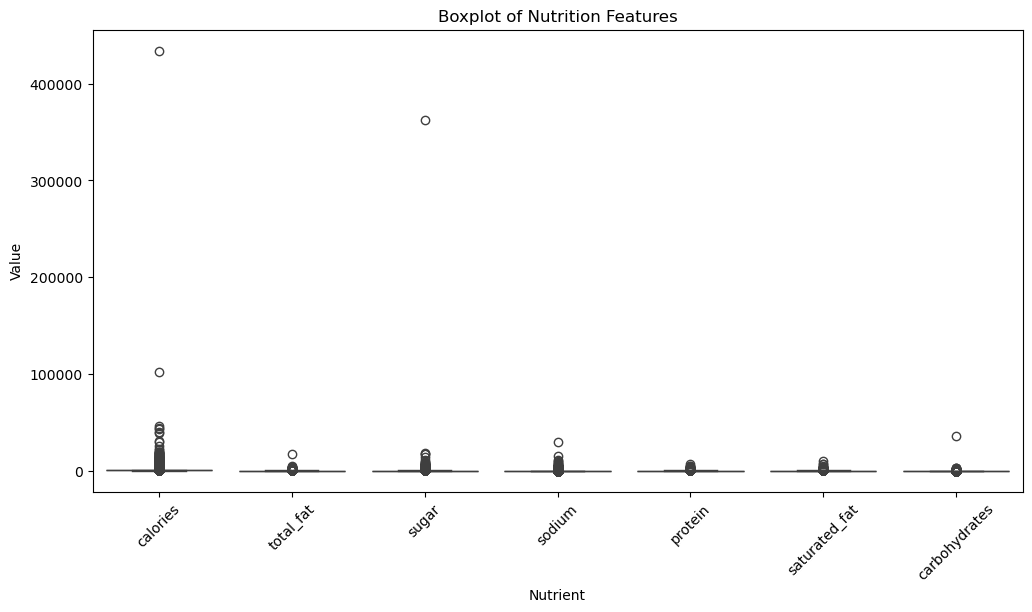

In [19]:
# Melt the dataframe to long format
df_melted = recipe_df[nutrition_col_names].melt(var_name="Nutrient", value_name="Value")
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Nutrient", y="Value", data=df_melted)
plt.title("Boxplot of Nutrition Features")
plt.xticks(rotation=45)
plt.show()


Notice that the boxplot appears as a horizontal line, it indicates that the range of most values is very small compared to extreme outliers. Outliers are stretching the y-axis scale, compressing the box (IQR range) into a line. To get around it we can apply a logarithmic transformation to reduce the skewness of the data caused by outliers

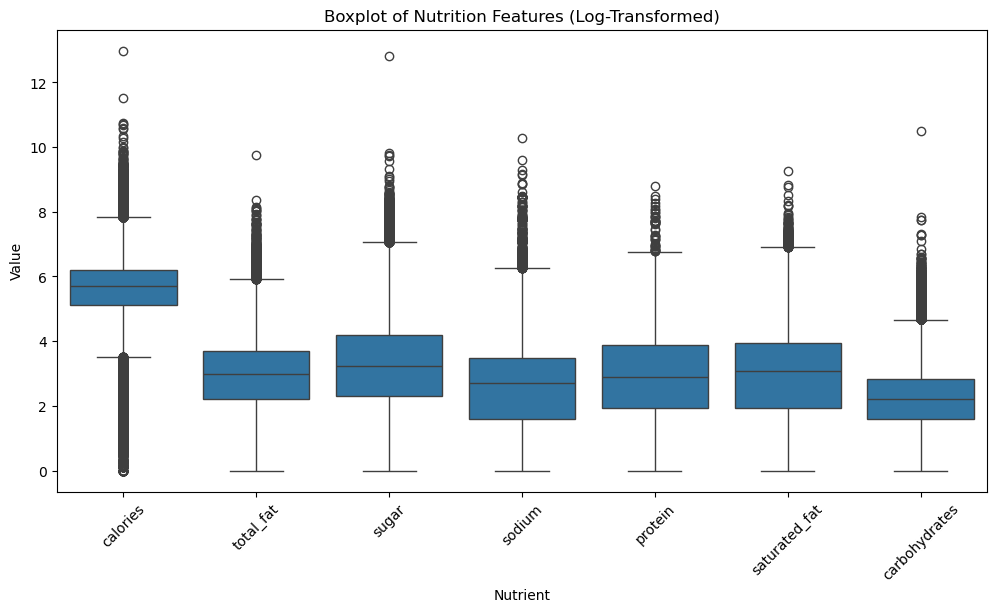

In [22]:
# Log-transform the data (adding 1 to avoid log(0))
df_log = recipe_df[nutrition_col_names].apply(lambda x: np.log1p(x))

# Melt the transformed dataframe
df_log_melted = df_log.melt(var_name="Nutrient", value_name="Value")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Nutrient", y="Value", data=df_log_melted)
plt.title("Boxplot of Nutrition Features (Log-Transformed)")
plt.xticks(rotation=45)
plt.show()

Without information about serving sizes (e.g., 100g, 1 cup, or 1 piece), the raw values in columns like "calories," "sodium," or "sugar" cannot be interpreted accurately. For instance, 450 calories might be reasonable for a meal-sized portion but could be excessive for a single cookie. Removing outliers without considering serving size risks excluding valid data points. For example, a data point with 2,000 calories might represent a family-sized dish rather than an error or anomaly. Therefore, we will not arbitrarily remove any data points.

### Correlation Analysis

Let us check for any collinearity between the columns of the dataset. Since we already have the `food_df` dataframe, which combines information from the `recipe_df` and `users_df` dataframes, we will use it for this analysis.

In [24]:
food_df = pd.read_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/food.pkl")

In [25]:
food_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'lactose_intolerance', 'gluten_intolerance', 'vegetarianism',
       'veganism', 'kosher', 'dairy-free', 'low-carb', 'submitted_day',
       'submitted_month', 'submitted_year', 'recipe_id', 'votes',
       'avg_rating'],
      dtype='object')

Since the `*id` columns will not exhibit any correlation structure, we will exclude them from the correlation plot. To achieve this, we will convert them into strings.

In [26]:
food_df["id"] = food_df["id"].astype(str)
food_df["contributor_id"] = food_df["contributor_id"].astype(str)
food_df["recipe_id"] = food_df["recipe_id"].astype(str)

In [27]:
# sanity check
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196439 entries, 0 to 196438
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 196439 non-null  object 
 1   id                   196439 non-null  object 
 2   minutes              196439 non-null  int64  
 3   contributor_id       196439 non-null  object 
 4   tags                 196439 non-null  object 
 5   n_steps              196439 non-null  int64  
 6   steps                196439 non-null  object 
 7   description          196439 non-null  object 
 8   ingredients          196439 non-null  object 
 9   n_ingredients        196439 non-null  int64  
 10  calories             196439 non-null  float64
 11  total_fat            196439 non-null  float64
 12  sugar                196439 non-null  float64
 13  sodium               196439 non-null  float64
 14  protein              196439 non-null  float64
 15  saturated_fat    

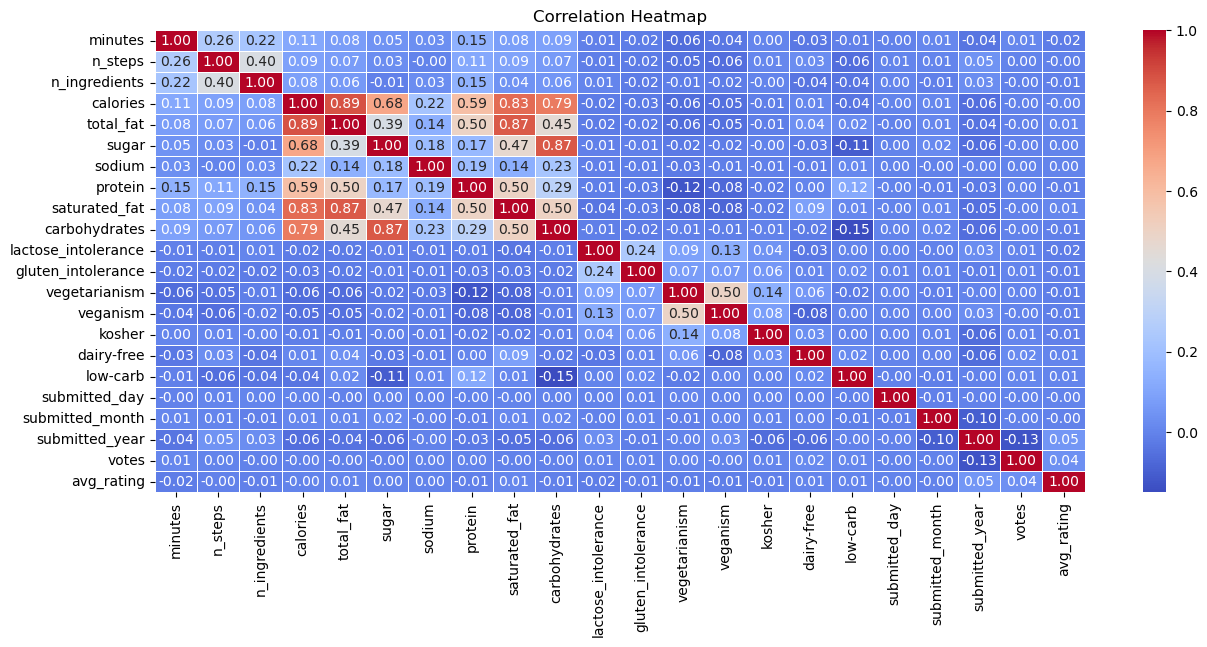

In [34]:
plt.figure(figsize=(15,6))
numeric_df = food_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create heatmap with better spacing
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 10})  # Adjust annotation font size
# Show plot
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Let us look at the heatmap in pieces.

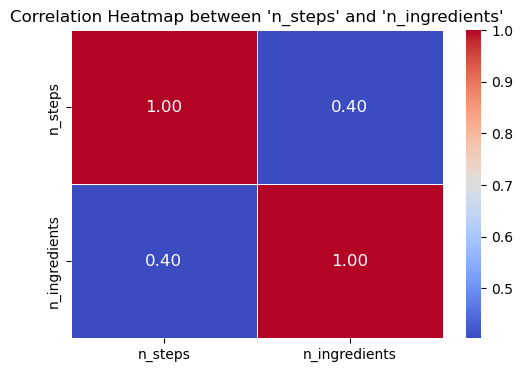

In [41]:
# Set figure size
plt.figure(figsize=(6, 4))
# Slice the correlation matrix to include only 'n_steps' and 'n_ingredients'
subset_matrix_1 = correlation_matrix.loc[["n_steps", "n_ingredients"], ["n_steps", "n_ingredients"]]

# Create heatmap for the small subset
sns.heatmap(subset_matrix_1, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 12})  # Adjust annotation font size

# Show plot
plt.title("Correlation Heatmap between 'n_steps' and 'n_ingredients'")
plt.show()

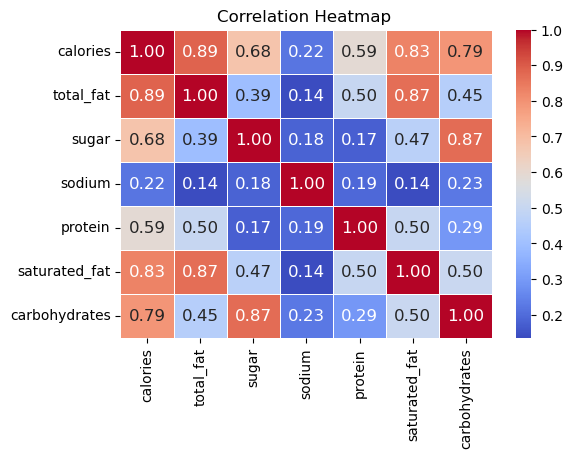

In [42]:
# nutrition_col_names
# Set figure size
plt.figure(figsize=(6, 4))
# Slice the correlation matrix to include only 'n_steps' and 'n_ingredients'
subset_matrix_2 = correlation_matrix.loc[nutrition_col_names, nutrition_col_names]

# Create heatmap for the small subset
sns.heatmap(subset_matrix_2, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 12})  # Adjust annotation font size

# Show plot
plt.title("Correlation Heatmap ")
plt.show()